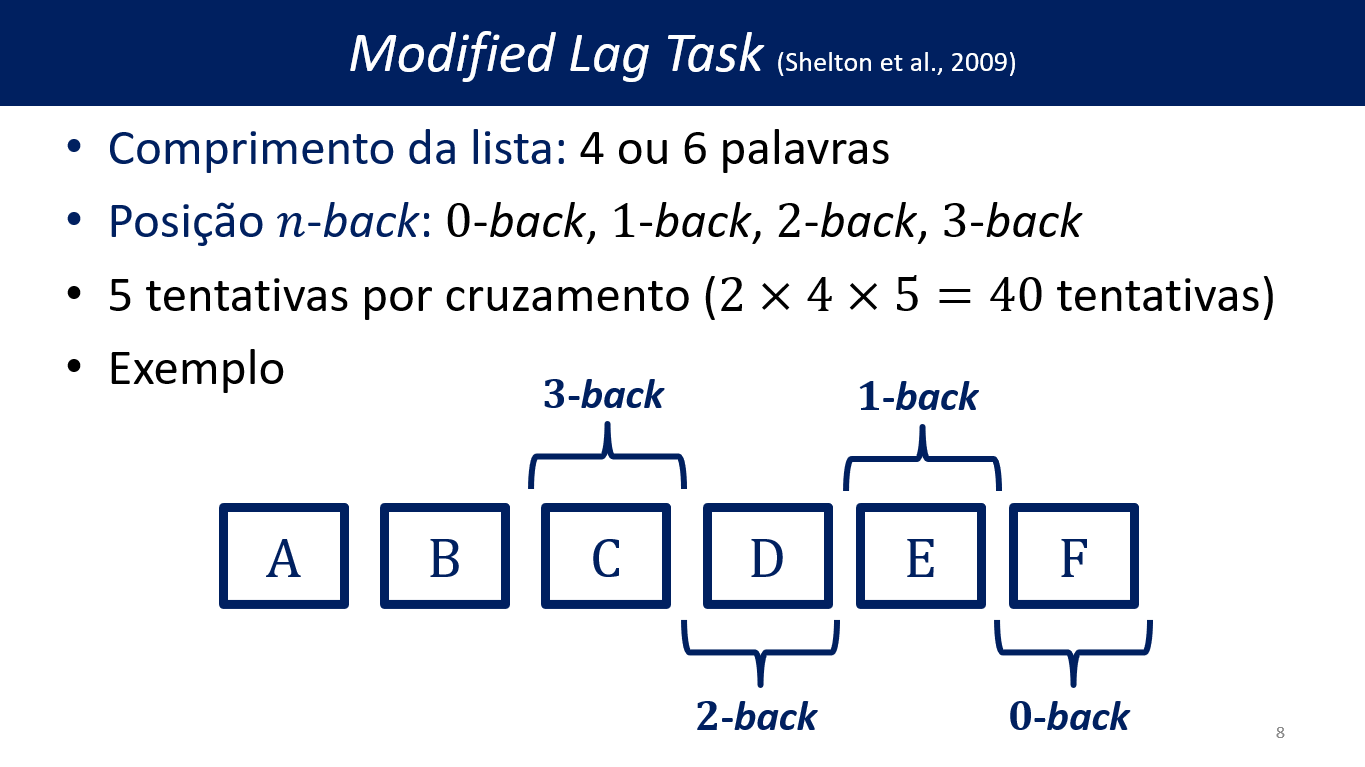

In [1]:
import random

words = ['água', 'agulha', 'animal', 'aranha', 'areia', 'árvore',
         'asa', 'bala', 'baleia', 'banana', 'banco', 'banho', 'barba',
         'barco', 'beijo', 'bicho', 'blusa', 'bocejo', 'bolo', 'bolso',
         'boneca', 'botão', 'brinco', 'bule', 'bíblia', 'cabelo', 'cabeça',
         'cabra', 'cadeia', 'café', 'caixão', 'caju', 'calo', 'calça', 'cama',
         'camisa', 'caneta', 'cantor', 'carro', 'carta', 'casa', 'casaco', 'cesto',
         'chapéu', 'chuchu', 'chute', 'chuva', 'chá', 'chão', 'cidade', 'cinto', 'circo',
         'comida', 'copo', 'coroa', 'corpo', 'couve', 'cárie', 'céu', 'dança', 'dedo',
         'dente', 'disco', 'escola', 'escova', 'estojo', 'farda', 'farelo', 'ferida',
         'filho', 'fio', 'flor', 'fogão', 'fogo', 'fruta', 'gato', 'gelo', 'girafa', 'goiaba',
         'gol', 'gola', 'gordo', 'gosma', 'grade', 'grama', 'haste', 'homem', 'igreja',
         'inseto', 'janela', 'jardim', 'jaula', 'juba', 'lã', 'ladrão', 'lagoa', 'lancha',
         'lanche', 'lápis', 'lata', 'látex', 'leão', 'leite', 'letra', 'linha', 'livro',
         'lixa', 'lixo', 'louça', 'lua', 'mãe', 'magro', 'manga', 'mão', 'mar', 'marcha',
         'marido', 'marte', 'massa', 'mastro', 'médico', 'meia', 'mel', 'menina', 'mesa',
         'metal', 'morro', 'mosca', 'moto', 'motor', 'móvel', 'mulher', 'muro', 'nadar',
         'nariz', 'neve', 'nudez', 'nuvens', 'objeto', 'pai', 'panela', 'pano', 'pão',
         'papel', 'parede', 'pátio', 'pato', 'pé', 'pedra', 'peixe', 'pele', 'pêra',
         'perna', 'pessoa', 'picada', 'pires', 'pneu', 'pó', 'ponte', 'porco', 'porta',
         'prato', 'prisão', 'prova', 'prédio', 'pulmão', 'quarto', 'queijo', 'rádio',
         'rainha', 'rede', 'rio', 'rocha', 'roda', 'rosa', 'roupa', 'rua', 'saco',
         'saia', 'sala', 'salada', 'sangue', 'sapato', 'selva', 'serra', 'sofá', 'sol',
         'sopa', 'suco', 'tabaco', 'tampa', 'tecido', 'teia', 'tênis', 'tinta', 'torta',
         'tosse', 'tricô', 'trigo', 'trono', 'túmulo', 'unha', 'uva', 'vaca', 'veneno',
         'vidro', 'violão', 'vulcão', 'xadrez', 'xícara']

In [2]:
len(words)

210

In [6]:
"""
Modified lag task (Shelton et al., 2007, 2009) - Gerador de tentativas
Requisitos do experimento:
- Fatores:
    * list_len ∈ {4, 6}
    * n_back  ∈ {0, 1, 2, 3}  (0 = última; 1 = penúltima; 2 = antepenúltima; 3 = ante-antepenúltima)
    * reps_per_cell = 5
- Total de tentativas = 2 × 4 × 5 = 40.
- Palavras são amostradas de `words` SEM reposição global (nenhuma palavra se repete na tarefa).
- Para cada tentativa, salvar gabarito (palavra-alvo) e a lista integral.
"""

# =========================
# PARÂMETROS DO EXPERIMENTO
# =========================
LIST_LENGTHS = [4, 6]          # dois comprimentos possíveis de lista (4 ou 6 itens)
N_BACK_LEVELS = [0, 1, 2, 3]   # n-back alvo: 0 = última, 1 = penúltima, 2 = antepenúltima, 3 = ante-antepenúltima
REPS_PER_CELL = 5              # número de repetições por combinação (list_len × n_back)

# ===========================
# GERAR O PLANO FATORIAL 2x4
# ===========================
# Cria todas as combinações (list_len, n_back), repetidas REPS_PER_CELL vezes.
design = []  # esta lista terá 40 dicionários, um por tentativa (ordem embaralhada depois)
for list_len in LIST_LENGTHS:            # itera por 4 e 6
    for n_back in N_BACK_LEVELS:         # itera por 0, 1, 2, 3
        for rep in range(1, REPS_PER_CELL + 1):  # repetições 1..5
            # cada célula do fatorial é um dicionário com metadados da tentativa
            design.append({"list_len": list_len, "n_back": n_back, "rep": rep})

# Embaralhe a ordem de apresentação das tentativas
# (apenas a ordem; os conteúdos ainda serão sorteados depois)
random.shuffle(design)

# ====================================
# AMOSTRAGEM SEM REPOSIÇÃO DAS PALAVRAS
# ====================================
# Estratégia: embaralhar `words` e consumir sequencialmente o número exato de
# palavras por tentativa (4 ou 6), garantindo que nenhuma palavra se repita no experimento.
pool = words[:]                 # cópia rasa da lista global 'words' para não alterá-la
random.shuffle(pool)            # embaralha o banco de palavras uma vez (reposição global: NÃO)
pool_pointer = 0                # ponteiro/índice de consumo sequencial dentro de 'pool'

# ==========================
# GERAÇÃO DAS TENTATIVAS
# ==========================
trials = []     # onde guardamos as tentativas já “resolvidas” (lista e gabarito)
trial_index = 0 # contador de tentativas (1..40), útil para inspeção

for cell in design:
    trial_index += 1                   # incrementa o índice da tentativa atual
    L = cell["list_len"]               # comprimento da lista desta tentativa (4 ou 6)
    n = cell["n_back"]                 # defasagem n-back (0..3)

    # Pega L palavras únicas do banco de palavras
    # Como 'pool' foi embaralhada e consumimos em fatias não sobrepostas, não há repetição global.
    my_list = pool[pool_pointer:pool_pointer + L]
    pool_pointer += L                  # avança o ponteiro para a próxima fatia

    # Índice-alvo (0-based): última = L-1, penúltima = L-1-1, etc.
    # Ex.: L=4, n=0 -> idx=3 (quarta posição); L=6, n=3 -> idx=2 (terceira posição)
    target_index = L - 1 - n
    assert 0 <= target_index < L, "n_back inválido para o comprimento da lista."
    # (Com L ∈ {4,6} e n ∈ {0,1,2,3}, esta asserção sempre deve ser verdadeira.)

    # Gabarito (palavra que o participante deve recordar)
    target_word = my_list[target_index]

    # Salva linha completa
    # - 'list_as_str' é útil para depuração/checagem manual.
    # - índices 0b (base 0) e 1b (base 1) ajudam a cruzar com logs humanos.
    trials.append({
        "trial_index": trial_index,
        "list_len": L,
        "n_back": n,
        "rep": cell["rep"],
        "target_index_0b": target_index,         # índice alvo (0-based) - contagem pythônica
        "target_index_1b": target_index + 1,     # índice alvo (1-based) - útil p/ checagem humana
        "target_word": target_word,
        "my_list": my_list[:]
    })

# Imprime um “cheirinho” das primeiras 3 tentativas para você ver a estrutura gerada.
print(f"Exemplo (primeiras 3 linhas):")
for r in trials[:3]:
    print(
        f"Tentativa = {r['trial_index']}\n"
        f"Comprimento da lista = {r['list_len']}\n"
        f"n-back = {r['n_back']}\n"
        f"Alvo({r['target_index_1b']}): {r['target_word']}\n"
        f"Lista: {r['my_list']}\n"
    )


Exemplo (primeiras 3 linhas):
Tentativa = 1
Comprimento da lista = 6
n-back = 1
Alvo(5): camisa
Lista: ['tênis', 'parede', 'caneta', 'lua', 'camisa', 'areia']

Tentativa = 2
Comprimento da lista = 6
n-back = 3
Alvo(3): pires
Lista: ['rede', 'metal', 'pires', 'tabaco', 'gelo', 'uva']

Tentativa = 3
Comprimento da lista = 6
n-back = 0
Alvo(6): bolso
Lista: ['beijo', 'nariz', 'xícara', 'mosca', 'prova', 'bolso']



In [20]:
trials[0]['my_list'][0]

'panela'

In [21]:
trials[0]['my_list'][1]

'xícara'

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

path = "C:/Users/limap/OneDrive/Área de Trabalho/Aula 076 – Modified Lag Task/data/"
df = pd.read_csv(f"{path}877541450_2025-09-15_18h24.15.163_Marcos_modified-lag-task.csv", sep = ",")

df = df[["list_len", "n_back", "score"]].dropna()
df.shape

(40, 3)

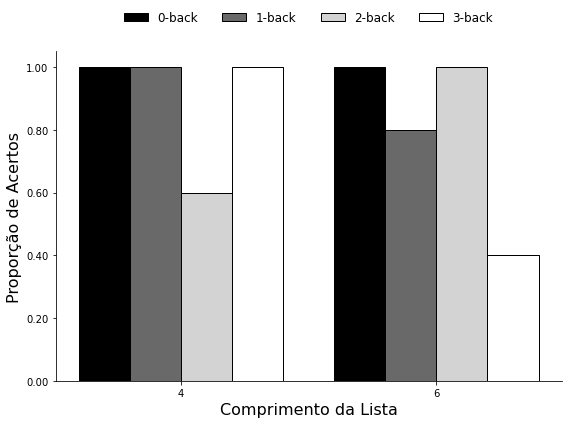

In [32]:
# calcular médias
grouped = df.groupby(["list_len", "n_back"])["score"].mean().reset_index()

colors = ["black", "dimgray", "lightgray", "white"]

# valores únicos de cada fator
list_lens = np.sort(grouped["list_len"].unique().astype(int))
n_backs = sorted(grouped["n_back"].unique())

# largura de cada barra
bar_width = 0.8 / len(n_backs)  
x = np.arange(len(list_lens))  # posições do eixo X

fig, ax = plt.subplots(figsize=(8, 6))

# desenhar barras para cada n_back
for i, n in enumerate(n_backs):
    means = grouped[grouped["n_back"] == n]["score"]
    ax.bar(x + i*bar_width, means, width=bar_width,
           color = colors[i],
           edgecolor = "black",
           label=f"{n:.0f}-back")

# customizar eixo X
ax.set_xticks(x + bar_width*(len(n_backs)-1)/2)
ax.set_xticklabels(list_lens)

# rótulos e título
ax.set_xlabel("Comprimento da Lista", fontsize = 16)
ax.set_ylabel("Proporção de Acertos", fontsize = 16)
ax.legend(
    fontsize=12, 
    frameon=False,
    loc="lower center",        # ancora na parte de baixo da bbox
    bbox_to_anchor=(0.5, 1.05),# centraliza acima do gráfico
    ncol=len(n_backs)          # põe todas as categorias numa linha só
)

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

ax.spines[["top", "right"]].set_visible(False)

plt.tight_layout()

plt.savefig("modified-lag-task.jpg", dpi = 600)


plt.show()
